In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook

In [2]:
def evaluate(func, xrange, yrange, resolution, args):
    res = func(np.tile(np.linspace(xrange[0], xrange[1], resolution), (resolution, 1)).T,
               np.tile(np.linspace(yrange[0], yrange[1], resolution), (resolution, 1)), *args)
    res_sign = np.sign(res)
    a = np.nonzero(np.diff(res_sign, axis=0))
    b = np.nonzero(np.diff(res_sign, axis=1))
    xpoints = xrange[0] + (np.r_[a[0], b[0]] / resolution) * (xrange[1] - xrange[0])
    ypoints = yrange[0] + (np.r_[a[1], b[1]] / resolution) * (yrange[1] - yrange[0])
    return xpoints, ypoints

### Linear model

In [3]:
def func(x, y, k1, k2):
    return k1 * x - k2 * y

xrange = [0, 5]
yrange = [0, 10]
resolution = 10000
xpoints1, ypoints1 = evaluate(func, xrange, yrange, resolution, (1, 1))

<IPython.core.display.Javascript object>


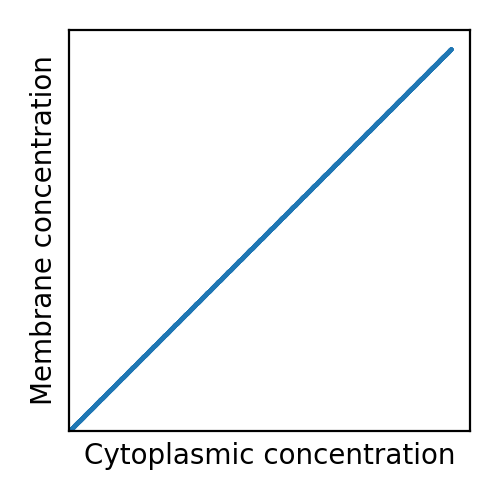

In [4]:
fig, ax = plt.subplots()
ax.scatter(xpoints1, ypoints1, s=0.1)
ax.set_xticks([])
ax.set_yticks([])
ax.set_xlabel('Cytoplasmic concentration', fontsize=10)
ax.set_ylabel('Membrane concentration', fontsize=10)
ax.set_xlim(left=0)
ax.set_ylim(bottom=0)
fig.set_size_inches(2.5, 2.5)
fig.tight_layout()
fig.savefig('Figs/schematic_linear.png', dpi=600, transparent=True)

### Positive feedback (monostable)

In [5]:
def func(x, y, k1, k2, k3, k4):
    return k1 * x - k2 * y + k3 * x * (y / (k4 + y))

xrange = [0, 1]
yrange = [0, 0.25]
resolution = 10000
xpoints2, ypoints2 = evaluate(func, xrange, yrange, resolution, (0.05, 1, 1, 1))

<IPython.core.display.Javascript object>


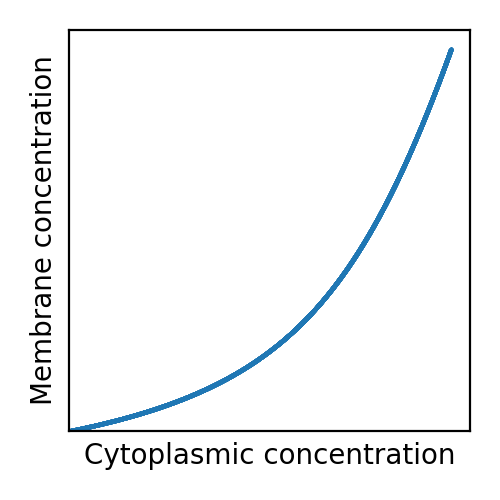

In [6]:
fig, ax = plt.subplots()
ax.scatter(xpoints2, ypoints2, s=0.1)
ax.set_xticks([])
ax.set_yticks([])
ax.set_xlabel('Cytoplasmic concentration', fontsize=10)
ax.set_ylabel('Membrane concentration', fontsize=10)
ax.set_xlim(left=0)
ax.set_ylim(bottom=0)
fig.set_size_inches(2.5, 2.5)
fig.tight_layout()
fig.savefig('Figs/schematic_feedback_monostable.png', dpi=600, transparent=True)

### Positive feedback (bistable)

In [7]:
def func(x, y, k1, k2, k3, k4):
    return k1 * x - k2 * y + k3 * x * ((y ** 2) / ((k4 ** 2) + (y ** 2)))


xrange = [0, 3]
yrange = [0, 3]
resolution = 10000
xpoints3, ypoints3 = evaluate(func, xrange, yrange, resolution, (0.05, 1, 1, 1))

<IPython.core.display.Javascript object>


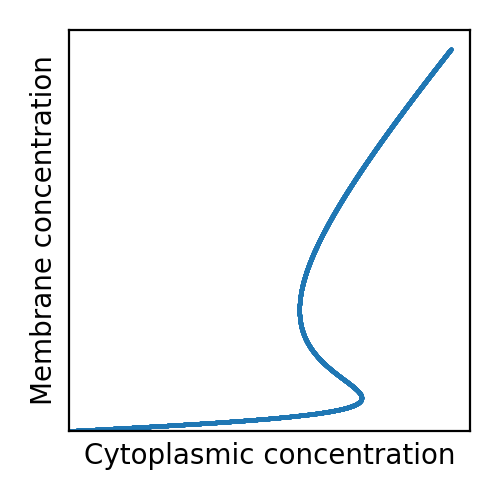

In [8]:
fig, ax = plt.subplots()
ax.scatter(xpoints3, ypoints3, s=0.1)
ax.set_xticks([])
ax.set_yticks([])
ax.set_xlabel('Cytoplasmic concentration', fontsize=10)
ax.set_ylabel('Membrane concentration', fontsize=10)
ax.set_xlim(left=0)
ax.set_ylim(bottom=0)
fig.set_size_inches(2.5, 2.5)
fig.tight_layout()
fig.savefig('Figs/schematic_feedback_bistable.png', dpi=600, transparent=True)